In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.33)
N, D = Xtrain.shape

In [29]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [30]:
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [31]:
# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [32]:
# Converting data to torch tensors
Xtrain = torch.from_numpy(Xtrain.astype(np.float32))
Xtest = torch.from_numpy(Xtest.astype(np.float32))
Ytrain = torch.from_numpy(Ytrain.astype(np.float32).reshape(-1, 1))
Ytest = torch.from_numpy(Ytest.astype(np.float32).reshape(-1, 1))

In [33]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracy = np.zeros(n_epochs)
test_accuracy = np.zeros(n_epochs)

for i in range(n_epochs):
  # Zero the gradient
  optimizer.zero_grad()

  # Forward pass
  outputs = model(Xtrain)
  loss = criterion(outputs, Ytrain)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  # This will tell us whether or not our model is overfitting
  # If we see the test loss increasing during training then we know that we are overfitting  
  outputs_test = model(Xtest)
  loss_test = criterion(outputs_test, Ytest)

  with torch.no_grad():
    train_accuracy[i] = np.mean(np.round(outputs.numpy()) == Ytrain.numpy())
    test_accuracy[i] = np.mean(np.round(outputs_test.numpy()) == Ytest.numpy())

  # Save losses
  train_losses[i] = loss.item()
  test_losses[i] = loss_test.item()

  if (i + 1) % 50 == 0:
    print(f"Epoch: {i+1}/{n_epochs}, Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}")

Epoch: 50/1000, Train Loss: 0.4094, Test Loss: 0.3643
Epoch: 100/1000, Train Loss: 0.3126, Test Loss: 0.2768
Epoch: 150/1000, Train Loss: 0.2574, Test Loss: 0.2269
Epoch: 200/1000, Train Loss: 0.2220, Test Loss: 0.1948
Epoch: 250/1000, Train Loss: 0.1974, Test Loss: 0.1723
Epoch: 300/1000, Train Loss: 0.1792, Test Loss: 0.1557
Epoch: 350/1000, Train Loss: 0.1652, Test Loss: 0.1430
Epoch: 400/1000, Train Loss: 0.1540, Test Loss: 0.1329
Epoch: 450/1000, Train Loss: 0.1449, Test Loss: 0.1247
Epoch: 500/1000, Train Loss: 0.1372, Test Loss: 0.1179
Epoch: 550/1000, Train Loss: 0.1306, Test Loss: 0.1123
Epoch: 600/1000, Train Loss: 0.1250, Test Loss: 0.1074
Epoch: 650/1000, Train Loss: 0.1200, Test Loss: 0.1032
Epoch: 700/1000, Train Loss: 0.1156, Test Loss: 0.0996
Epoch: 750/1000, Train Loss: 0.1117, Test Loss: 0.0964
Epoch: 800/1000, Train Loss: 0.1082, Test Loss: 0.0936
Epoch: 850/1000, Train Loss: 0.1050, Test Loss: 0.0912
Epoch: 900/1000, Train Loss: 0.1022, Test Loss: 0.0890
Epoch: 950/

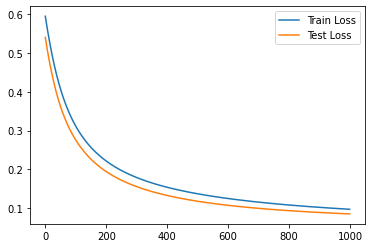

In [34]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

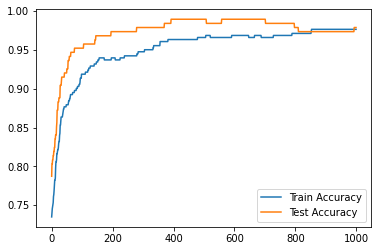

In [35]:
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend();

In [36]:
with torch.no_grad():
  ptrain = np.round(model(Xtrain).numpy())
  train_acc = np.mean(ptrain == Ytrain.numpy())

  ptest = np.round(model(Xtest).numpy())
  test_acc = np.mean(ptest == Ytest.numpy())

  print(f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.98, Test Accuracy: 0.98


# Save and Load the Model

In [37]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5356, -0.3187, -0.2559, -0.3949,  0.0056, -0.1926, -0.5132, -0.3746,
                        0.0210,  0.3233, -0.2590, -0.3679, -0.4141, -0.4598, -0.0513,  0.6076,
                        0.3338, -0.3280,  0.4011,  0.1795, -0.3948, -0.3193, -0.3254, -0.3492,
                       -0.3819, -0.3276, -0.4458, -0.4812, -0.4200, -0.1203]])),
             ('0.bias', tensor([0.5256]))])

In [38]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [39]:
!ls

mymodel.pt  sample_data


In [40]:
# Load the model
# It is used for handling big models
model_load = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model_load.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [41]:
# Check whether the loaded model is the same as the saved model
with torch.no_grad():
  ptrain = np.round(model_load(Xtrain).numpy())
  train_acc_loaded_model = np.mean(ptrain == Ytrain.numpy())

  ptest = np.round(model_load(Xtest).numpy())
  test_acc_loaded_model = np.mean(ptest == Ytest.numpy())

  print(f"Train Accuracy: {train_acc_loaded_model:.2f}, Test Accuracy: {test_acc_loaded_model:.2f}")
  print(f"Same Model is Loaded: {train_acc == train_acc_loaded_model and test_acc == test_acc_loaded_model}")

Train Accuracy: 0.98, Test Accuracy: 0.98
Same Model is Loaded: True


In [42]:
# Download the model
from google.colab import files
files.download("mymodel.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>